# Random Forest

In [3]:
import pandas as pd

df = pd.read_csv('/home/mgabriel4/Documentos/GitHub/machine-learning/data/AmesHousing.csv')

print("Primeiras 5 linhas do dataset:")
print(df.head())

print("\nInformações do dataset:")
print(df.info())

print("\nEstatísticas descritivas:")
print(df.describe(include='all'))

colunas = df.columns
print("\nColunas do dataset:")
print(colunas)

nulos = df.isnull().sum()
print("\nValores ausentes por coluna:")
print(nulos.head(100).to_string())

Primeiras 5 linhas do dataset:
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale 

/tmp/ipykernel_643749/3799709361.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_643749/3799709361.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 


Valores ausentes por coluna:
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt

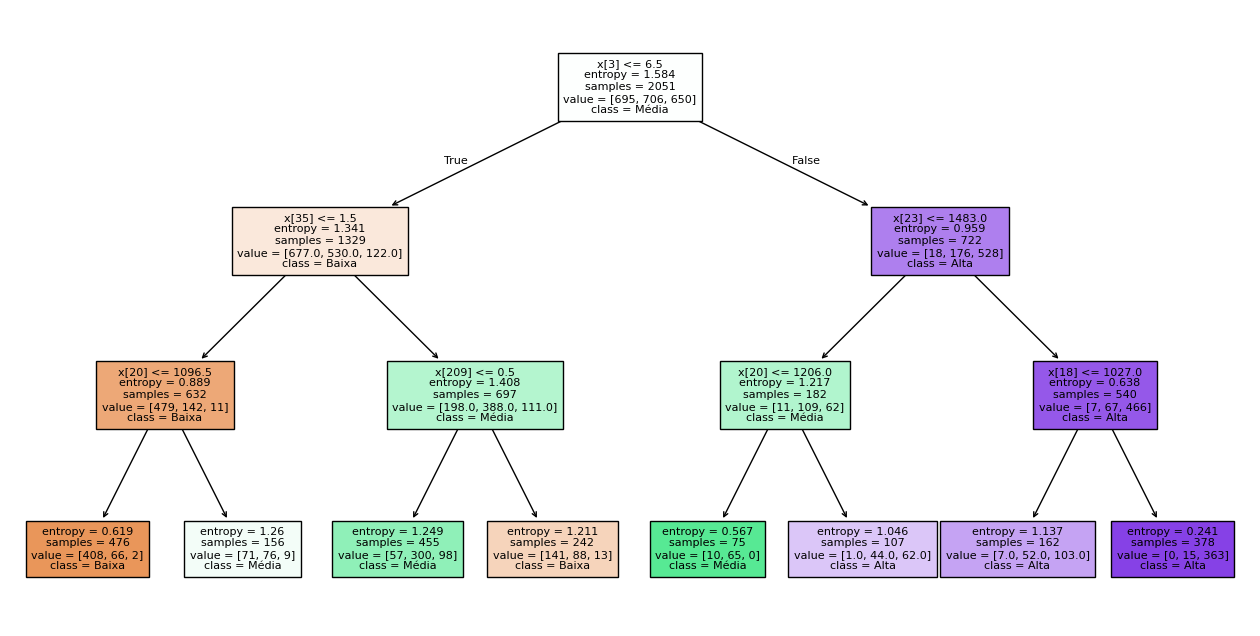

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree 

df = pd.read_csv('/home/mgabriel4/Documentos/GitHub/machine-learning/data/AmesHousing.csv')

df=df.drop(columns=['Order', 'PID'])  #removendo colunas irrelevantes

#tratamento de valores nulos
maiores_valores_nulos = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']
df = df.drop(columns=maiores_valores_nulos)

#variáveis numéricas -> preencher com mediana
#variáveis categóricas -> preencher com moda
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

nulos = df.isnull().sum()
print("\nValores ausentes por coluna:")
print(nulos.head(100).to_string())

#label encoding para variáveis categóricas
#usamos label encoding quando a variável categórica é ordinal (tem uma ordem) e tem poucas categorias
#cada categoria recebe um número inteiro

#porém, ao invés de fazer o Label Encoding, fiz o mapeamento para variáveis ordinais, para manter a ordem
variaveis_ordinal = {
    'Exter Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Exter Cond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Bsmt Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Bsmt Cond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Heating QC': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Kitchen Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Garage Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Garage Cond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Bsmt Exposure': {'No':1, 'Mn':2, 'Av':3, 'Gd':4},
    'BsmtFin Type 1': {'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
    'BsmtFin Type 2': {'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
    'Functional': {'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8},
}

for col, mapping in variaveis_ordinal.items():
    if col in df.columns:
        df[col] = df[col].map(mapping).fillna(0).astype(int)

#one hot encoding para variáveis categóricas nominais
#usamos one hot encoding quando a variável categórica não é ordinal (não tem uma ordem) e tem poucas categorias
#cria uma nova coluna para cada categoria, com 0 ou 1 indicando a presença ou ausência da categoria

variaveis_nominais = [
    'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
    'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
    'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation',
    'Heating', 'Central Air', 'Electrical', 'Garage Type', 'Garage Finish',
    'Paved Drive', 'Sale Type', 'Sale Condition'
]

df = pd.get_dummies(df, columns=variaveis_nominais)

print(df.head(10))

#criando a target para classificar o preço das casas em baixa, média e alta
print(df['SalePrice'].describe()) 

df['Target'] = pd.qcut(  #divide em quantis
    df['SalePrice'], 
    q=3, 
    labels=['Baixa', 'Média', 'Alta']
)

#transformando a variável target em numérica
df['Target'] = df['Target'].map({'Baixa':0, 'Média':1, 'Alta':2}).astype('int')

print(df['Target'].value_counts()) #o que coincide com a divisão em tercis, ou seja, 1/3 dos dados em cada classe

#features -> são as variáveis de entrada, colunas a serem usadas pra prever ou explicar algo (x)
x = df.drop(columns=['SalePrice', 'Target']) #selecionei todas as colunas menos a target e a SalePrice
y = df['Target']

features = x.columns.tolist()
print("Features usadas no modelo:\n", features)
#divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("Tamanho do treino:", X_train.shape)
print("Tamanho do teste:", X_test.shape)
print("\nDistribuição das classes no target:")
print(y_train.value_counts(normalize=True))

#criação e treino do modelo de árvore de decisão
clf = DecisionTreeClassifier(random_state=42, max_depth=3, criterion='entropy')  # você pode ajustar max_depth
clf.fit(X_train, y_train)

#fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

#avaliação do modelo
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

#visualização da árvore de decisão
plt.figure(figsize=(16,8))
plot_tree(clf, filled=True, fontsize=8, class_names=['Baixa','Média','Alta'])
plt.show()

Accuracy: 0.8248009101251422
Feature Importances: (array([6.04608086e-03, 1.33237622e-02, 1.47968788e-02, 9.84719426e-02,
       1.82119848e-03, 5.78232862e-02, 1.66839401e-02, 1.24455635e-02,
       4.67008694e-02, 2.51199621e-04, 6.01027915e-02, 3.44464009e-04,
       9.46714457e-04, 9.63291135e-03, 1.93633127e-02, 2.69374342e-04,
       3.38048132e-04, 1.99117153e-03, 5.80482969e-02, 2.05275057e-02,
       4.15074162e-02, 2.20327481e-02, 9.64166433e-05, 8.46549222e-02,
       3.61728144e-03, 2.25599213e-04, 2.50511275e-02, 3.43092774e-03,
       3.97486661e-03, 2.07417477e-03, 3.54550759e-02, 1.32771712e-02,
       2.20242951e-04, 2.91271042e-02, 4.41266758e-02, 5.01362305e-02,
       3.91952988e-02, 1.14685440e-04, 2.24802578e-04, 4.85789281e-03,
       8.14497836e-03, 8.88873915e-04, 5.97878370e-05, 1.01867516e-03,
       1.37967100e-04, 2.60212617e-04, 6.63652345e-04, 3.31987986e-04,
       0.00000000e+00, 0.00000000e+00, 1.41120000e-03, 0.00000000e+00,
       1.73345332e-04, 4.1

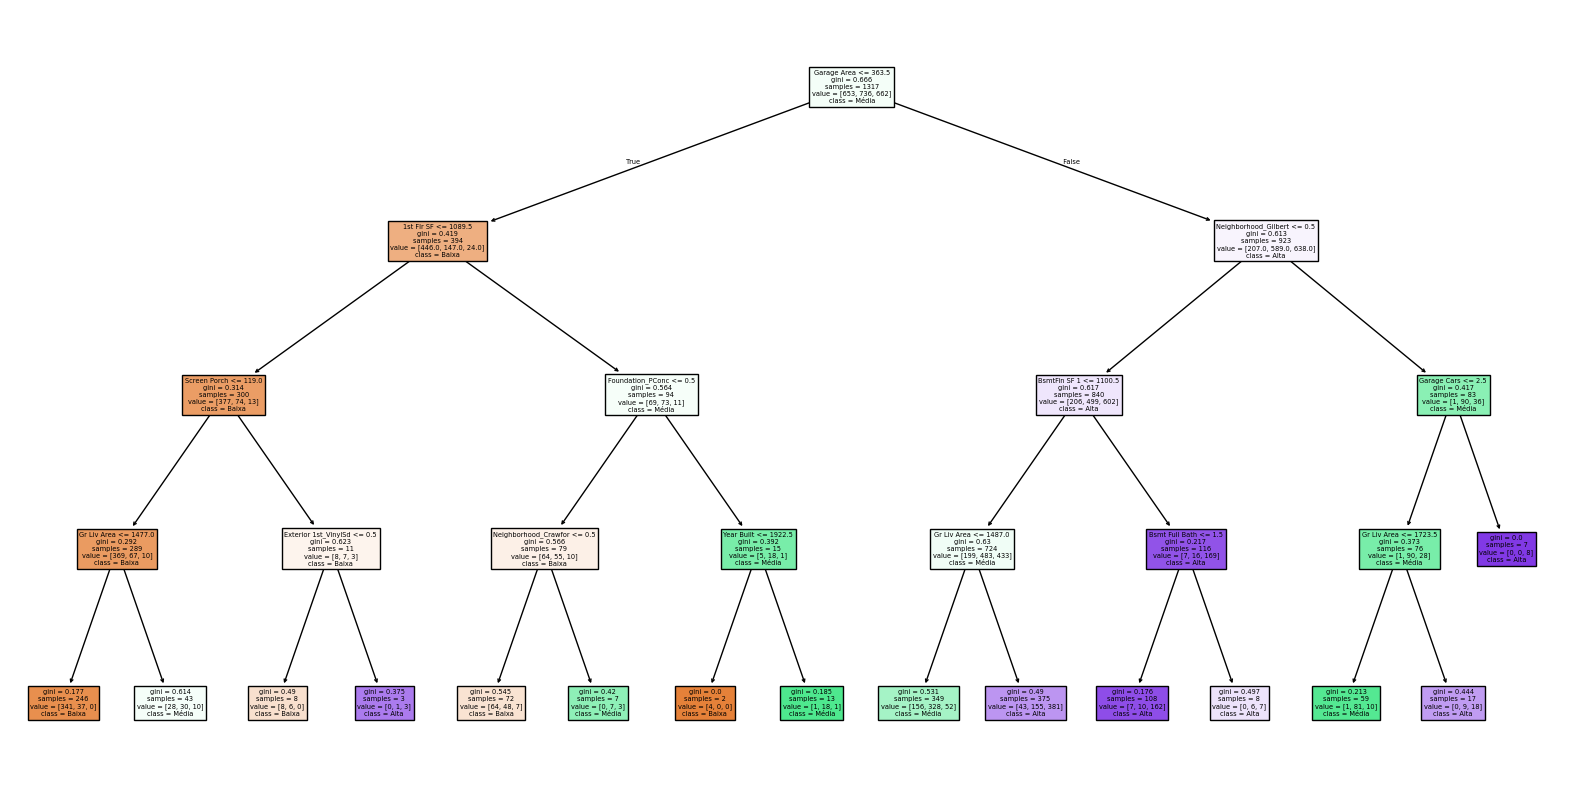

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100,  # Number of trees
                            max_depth=4,       # Max depth of trees
                            max_features='sqrt',  # Features per split
                            random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
predictions = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")

# Feature importances
print(f"Feature Importances: {rf.feature_importances_, rf.feature_names_in_}")

# Visualize one tree from the forest
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], filled=True, feature_names=features, class_names=['Baixa','Média','Alta'])
plt.savefig('/home/mgabriel4/Documentos/GitHub/machine-learning/docs/classes/random-forest/img/arvore_random_forest.png')
plt.show()

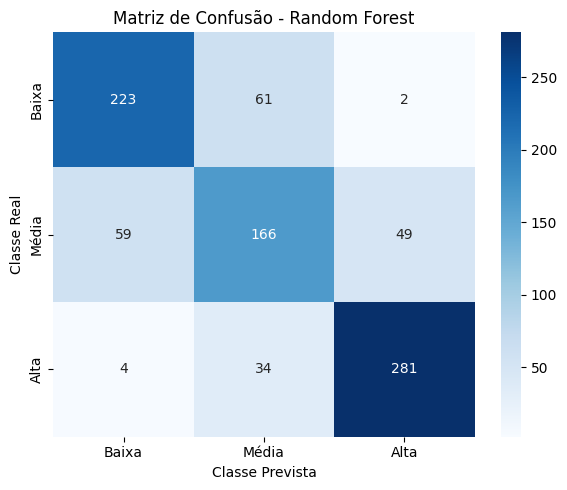

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Baixa', 'Média', 'Alta'],
            yticklabels=['Baixa', 'Média', 'Alta'])
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão - Random Forest")
plt.tight_layout()